## Calculate climatological values

In [1]:
import xarray as xr
import gfdl_utils as gu
from information import *
from processing import *
from dask.diagnostics import ProgressBar

### Seasonal

In [103]:
def calc_seasonal(da):
    return da.groupby('time.month').mean().chunk({'month':-1})

In [121]:
variable = 'chlos'
frequency = 'monthly'

In [122]:
outfile = '.'.join([variable,frequency,'nc'])
outdir = ppeDict['datasavedir']+'/processed/climatology/seasonal/'
outpath = outdir+outfile

In [123]:
pathDict = get_pathDict_control(variable,frequency)
ds = gu.core.open_frompp(**pathDict)

In [124]:
clim = calc_seasonal(ds[variable])
with ProgressBar():
    clim = clim.compute()

[########################################] | 100% Completed | 18.35 s


In [125]:
clim.to_netcdf(outpath)

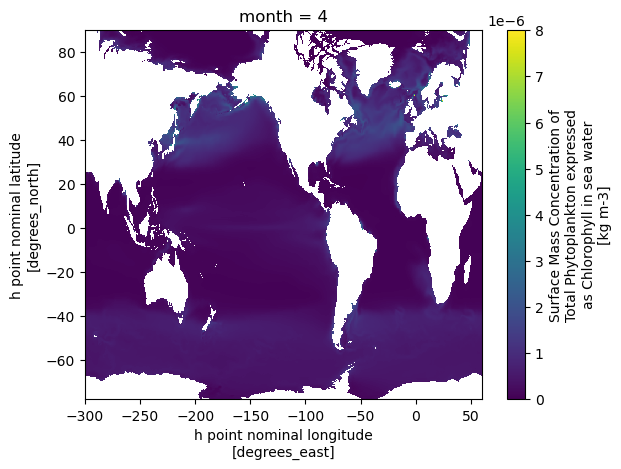

In [126]:
clim.isel(month=3).plot()

### Annual minimum and maximum

In [2]:
def calc_meanannualminmax(da,min_or_max):
    if min_or_max == 'min':
        return da.groupby('time.year').min().chunk({'year':"auto"}).mean('year')
    elif min_or_max == 'max':
        return da.groupby('time.year').max().chunk({'year':"auto"}).mean('year')

In [3]:
variable = 'dfeos'
frequency = 'monthly'

In [4]:
pathDict = get_pathDict_control(variable,frequency)
ds = gu.core.open_frompp(**pathDict)

In [5]:
min_or_max = 'min'

In [6]:
outfile = '.'.join([variable,frequency,'nc'])
outdir = ppeDict['datasavedir']+'/processed/climatology/meanannual'+min_or_max+'/'
outpath = outdir+outfile

In [7]:
clim = calc_meanannualminmax(ds[variable],min_or_max)
with ProgressBar():
    clim = clim.compute()
clim.to_netcdf(outpath)

[##############################          ] | 76% Completed | 10.94 ss

/nbhome/gam/miniconda3/envs/climpred_clean/lib/python3.10/site-packages/dask/array/reductions.py:616: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)


[########################################] | 100% Completed | 14.59 s
